C:\Users\Filipe Felisardo\AppData\Local\Temp\ipykernel_17228\3901054564.py:25: RuntimeWarning: invalid value encountered in add
  w[1:] += update * xi
C:\Users\Filipe Felisardo\AppData\Local\Temp\ipykernel_17228\3901054564.py:26: RuntimeWarning: invalid value encountered in scalar add
  w[0] += update
c:\Users\Filipe Felisardo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[ 8  0  0]
 [13  0  0]
 [ 9  0  0]]
Accuracy: 0.26666666666666666
Precision: 0.07111111111111111
Recall: 0.26666666666666666
F1 Score: 0.11228070175438597


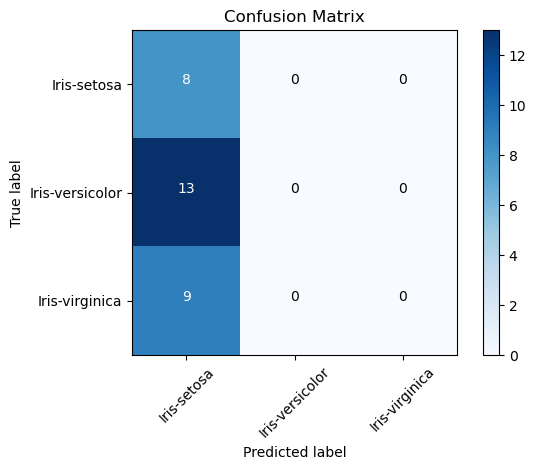

In [12]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

class Perceptron():
    def __init__(self, eta=0.1, n_iter=50, classes=None):
        self.eta = eta
        self.n_iter = n_iter
        self.classes = classes
        self.classifiers = {}

    def fit(self, X, y):
        for class_label in self.classes:
            binary_y = np.where(y == class_label, 1, -1)
            self.classifiers[class_label] = self.train_binary_classifier(X, binary_y)

    def train_binary_classifier(self, X, y):
        w = np.random.uniform(-1, 1, size=X.shape[1] + 1)  # Add one for the bias term
        for _ in range(self.n_iter):
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict_binary(xi, w))
                w[1:] += update * xi
                w[0] += update
        return w

    def predict(self, X):
        predictions = {}
        for class_label, classifier in self.classifiers.items():
            predictions[class_label] = self.predict_binary(X, classifier)
        return max(predictions, key=predictions.get)

    def predict_binary(self, X, w):
        net_input = np.dot(X, w[1:]) + w[0]
        return net_input

# Compute classification metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# import dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

SPECIES_1 = {'name': "Iris-setosa", 's': 0, 'end': 50}
SPECIES_2 = {'name': "Iris-versicolor", 's': 50, 'end': 100}
SPECIES_3 = {'name': "Iris-virginica", 's': 100, 'end': 150}
spA, spB, spC = SPECIES_1, SPECIES_2, SPECIES_3

# preparing our data to be understood by our model
X = df.iloc[np.r_[spA['s']:spA['end'], spB['s']:spB['end'], spC['s']:spC['end']], [0, 2]].values
y = df.iloc[np.r_[spA['s']:spA['end'], spB['s']:spB['end'], spC['s']:spC['end']], 4].values

# Shuffle the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Splitting the dataset into training and validation sets (80% training, 20% validation)
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# Define classes
classes = [spA['name'], spB['name'], spC['name']]

ppn = Perceptron(eta=0.1, n_iter=150, classes=classes) # initializing a new perceptron
ppn.fit(X_train, y_train)

# Validation
y_pred = [ppn.predict(x) for x in X_val]

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Compute classification metrics
accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)

# Display metrics
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
plt.tight_layout()
plt.show()
